# Práctica 4
## Variables aleatorias

In [28]:
library(prob)
library(ggplot2)
options(repr.plot.width=3, repr.plot.height=3)

### Ejercicio
##### Encontrar los histogramas de probabilidad para las distribuciones asociadas a las siguientes variables aleatorias:
* El número de águilas que aparecen cuando lanzamos tres monedas al aire.

In [13]:
lanzamiento_tres_monedas = tosscoin(times=3, makespace=T)

In [14]:
head(lanzamiento_tres_monedas)

toss1,toss2,toss3,probs
<fct>,<fct>,<fct>,<dbl>
H,H,H,0.125
T,H,H,0.125
H,T,H,0.125
T,T,H,0.125
H,H,T,0.125
T,H,T,0.125


$\text{Sea   } águila = H \text{   y    } sol = T$

In [45]:
obtener_0_aguilas <- isin(lanzamiento_tres_monedas, c("T", "T", "T"), ordered = FALSE)
obtener_1_aguilas <- isin(lanzamiento_tres_monedas, c("H", "T", "T"), ordered = FALSE)
obtener_2_aguilas <- isin(lanzamiento_tres_monedas, c("H", "H", "T"), ordered = FALSE)
obtener_3_aguilas <- isin(lanzamiento_tres_monedas, c("H", "H", "H"), ordered = FALSE)

prob_0_aguilas <- sum(subset(lanzamiento_tres_monedas, obtener_0_aguilas)$probs)
prob_1_aguilas <- sum(subset(lanzamiento_tres_monedas, obtener_1_aguilas)$probs)
prob_2_aguilas <- sum(subset(lanzamiento_tres_monedas, obtener_2_aguilas)$probs)
prob_3_aguilas <- sum(subset(lanzamiento_tres_monedas, obtener_3_aguilas)$probs)
probabilidades <- c(prob_0_aguilas,prob_1_aguilas,prob_2_aguilas,prob_3_aguilas)

In [46]:
df <- data.frame(num_aguilas = c(0, 1, 2, 3), probabilidades)
df

num_aguilas,probabilidades
<dbl>,<dbl>
0,0.125
1,0.375
2,0.375
3,0.125


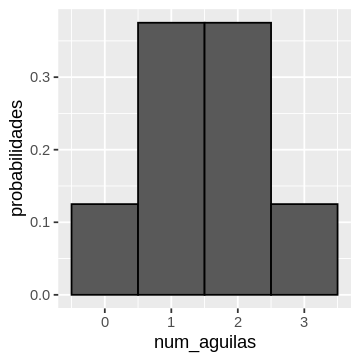

In [83]:
plot <- ggplot(data = df, aes(x=num_aguilas, y=probabilidades)) 
plot <- plot + geom_col(width=1, colour='#000000')
plot

In [77]:
lanzamiento_dos_dados <- rolldie(2, makespace=T)
head(lanzamiento_dos_dados)

X1,X2,probs
<int>,<int>,<dbl>
1,1,0.02777778
2,1,0.02777778
3,1,0.02777778
4,1,0.02777778
5,1,0.02777778
6,1,0.02777778


In [112]:
lanzamiento_dos_dados$side_sum <- lanzamiento_dos_dados$X1 + lanzamiento_dos_dados$X2
head(lanzamiento_dos_dados)

X1,X2,probs,side_sum
<int>,<int>,<dbl>,<int>
1,1,0.02777778,2
2,1,0.02777778,3
3,1,0.02777778,4
4,1,0.02777778,5
5,1,0.02777778,6
6,1,0.02777778,7


In [120]:
df <- aggregate(lanzamiento_dos_dados$probs, by=list(lanzamiento_dos_dados$side_sum), FUN=sum)
names(df)[1] <- "suma_caras"
names(df)[2] <- "probabilidad"
head(df)

suma_caras,probabilidad
<int>,<dbl>
2,0.02777778
3,0.05555556
4,0.08333333
5,0.11111111
6,0.13888889
7,0.16666667


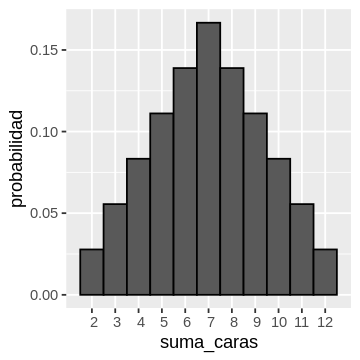

In [122]:
ggplot(data = df, aes(x=suma_caras, y=probabilidad)) +
geom_col(width=1, colour='black') +
scale_x_discrete(limits=df$suma_caras)

### Ejercicio: 8000 boletos para una rifa de $\$5000.00$ y cada boleto cuesta $\$2.00$.
#### a)  Encontrar la ganancia esperada del comprador de un boleto.

$$
\begin{array}{ccc}
E\left(X\right) & = & \frac{1}{8000}\left(4998\right)+\frac{7999}{8000}\left(-2\right)  =  -1.375
\end{array}
$$

In [130]:
df = data.frame(evento = c('ganar_rifa', 'perder_rifa'), X = c(4998, -2), probabilidad = c(1/8000, 7999/8000))
df

evento,X,probabilidad
<fct>,<dbl>,<dbl>
ganar_rifa,4998,0.000125
perder_rifa,-2,0.999875


In [131]:
valor_esperado_ganancia = sum(df$X * df$probabilidad)
print(paste('Valor esperado = $',valor_esperado_ganancia ))

[1] "Valor esperado = $ -1.375"


---
#### b) Hacer la gráfica de la ganancia esperada que tiene una compradora en términos de un número de boletos $n$.

In [169]:
n <- 8000
n_boletos = seq(0, n, 100)
n_boletos[1] = 1
prob_ganar = 1/n_boletos
prob_perder = 1 - prob_ganar
premio = 5000
costo_boleto = 2
ganancia = premio - costo_boleto
perdida = -costo_boleto
val_esp_ganancia_compradora = (prob_ganar * ganancia) + (prob_perder*perdida)
val_esp_ganancia_organizacion = (costo_boleto * n_boletos) - premio

In [170]:
df = data.frame(n_boletos, val_esp_ganancia_compradora, val_esp_ganancia_organizacion)
tail(df)

,n_boletos,val_esp_ganancia_compradora,val_esp_ganancia_organizacion
,<dbl>,<dbl>,<dbl>
76,7500,-1.333333,10000
77,7600,-1.342105,10200
78,7700,-1.350649,10400
79,7800,-1.358974,10600
80,7900,-1.367089,10800
81,8000,-1.375000,11000


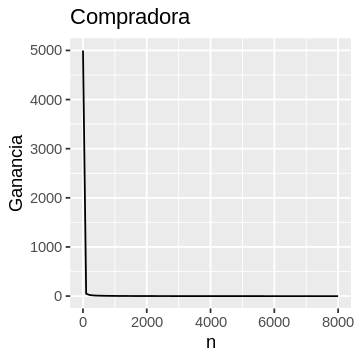

In [176]:
ggplot(data= df) + 
geom_line(mapping = aes(x = n_boletos, y = val_esp_ganancia_compradora)) +
labs(title = 'Compradora', x = 'n', y = 'Ganancia') 

#### c) ¿Cuál debería de ser el premio mínimo para que se pudiese garantizar “salir a mano” al comprar todos los boletos.

In [180]:
val_esp_ganancia_organizacion

[1] -4998 -4800 -4600 -4400 -4200 -4000 -3800 -3600 -3400 -3200 -3000 -2800
[13] -2600 -2400 -2200 -2000 -1800 -1600 -1400 -1200 -1000  -800  -600  -400
[25]  -200     0   200   400   600   800  1000  1200  1400  1600  1800  2000
[37]  2200  2400  2600  2800  3000  3200  3400  3600  3800  4000  4200  4400
[49]  4600  4800  5000  5200  5400  5600  5800  6000  6200  6400  6600  6800
[61]  7000  7200  7400  7600  7800  8000  8200  8400  8600  8800  9000  9200
[73]  9400  9600  9800 10000 10200 10400 10600 10800 11000

In [181]:
which(val_esp_ganancia_organizacion==0)

[1] 26

In [182]:
indice = which(val_esp_ganancia_organizacion == 0)

In [184]:
boletos_minimos = n_boletos[indice]
boletos_minimos

[1] 2500